# Assignment done by: Felix Aufreiter (1251759)

<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
import random
import matplotlib.pyplot as plt
import time

In [2]:
# a.) 

# create a generator function for the dice

def dice8():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    weights = [1, 2, 3, 4, 5, 6, 7, 8]
    while True:
        yield random.choices(sides, weights=weights, k=1)[0]

next(dice8())

4

In [3]:
rolls = 2

dice_generator = dice8() #use generator function

# Roll the DICE!!!
for i in range(rolls):
    result = next(dice_generator)
    print(f"Roll {i+1}, result = {result}")

    
#testing the generator function

Roll 1, result = 4
Roll 2, result = 8


In [4]:
# b)

#roll the dice 1000 times

# same generator function like above

def dice8_1000():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    weights = [1, 2, 3, 4, 5, 6, 7, 8]
    while True:
        yield random.choices(sides, weights=weights, k=1)[0]

dice_generator1000 = dice8_1000()

In [8]:
# b)

#roll the dice 1000 times

casts = 1000
roll1000_results = [] # count the results
dice_generator1000 = dice8_1000() 
counts = {i: 0 for i in range(1, 9)} #range 1 to 8

#for loop to cast 1000 times

for i in range(casts):
    result = next(dice_generator1000)
    roll1000_results.append(result)
    counts[result] += 1
        
# dictionary with sides + counts
data1000 = {"side": [], "count": []}
for side in counts:
    data1000["side"].append(side)
    data1000["count"].append(counts[side])

# create the dataframe from the dictionary
df_1000 = data1000
print(df_1000)

{'side': [1, 2, 3, 4, 5, 6, 7, 8], 'count': [20, 60, 82, 111, 137, 174, 205, 211]}


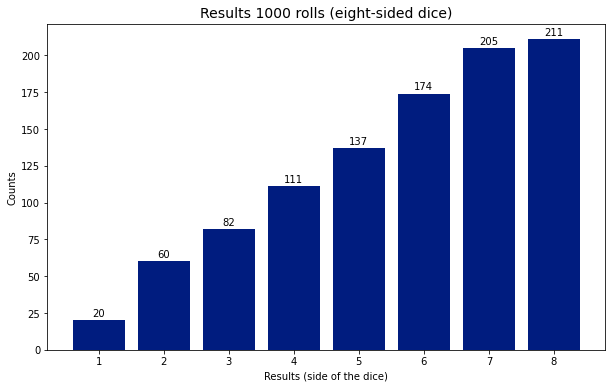

In [9]:
#plotting the results of 1000 casts of the dice

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use("seaborn-dark-palette")

counts = df_1000['count']
bar_labels = df_1000['side']

ax.bar(bar_labels, counts)
ax.set_xlabel('Results (side of the dice)', fontsize=10)
ax.set_ylabel('Counts', fontsize=10)
ax.set_title('Results 1000 rolls (eight-sided dice)')
ax.title.set_size(14)
plt.bar_label(ax.containers[0], label_type='edge', padding=2, fontsize=10)

plt.show()

Additional information: https://pynative.com/python-weighted-random-choices-with-probability/

In [10]:
# c)

def dice_time():
    seiten = [1, 2, 3, 4, 5, 6, 7, 8]
    gewichtung = [1, 2, 3, 4, 5, 6, 7, 8] # I wasn't sure if the weights should also be part of the code
    counts = {seite: 0 for seite in seiten}
    start_time = time.time()
    total_time = 0
   # seite = None  # Initialize seite to None
    while not all(counts.values()):
        result = random.choices(seiten, weights=gewichtung, k=1)[0]
        counts[result] += 1
        yield result
    total_time = time.time() - start_time
    yield f"Alle Seiten des Würfels wurden ERFOLGREICH erwürfelt. Vergangene Zeit: {total_time:.5f} Sekunden." 
    # {total_time: .5f} --> KOMMASTELLEN anpassen

In [11]:
#duration until all 

wuerfelzeit = dice_time()

for wurf in wuerfelzeit:
    print(wurf)

4
8
8
6
7
3
8
5
8
8
6
5
7
8
6
5
7
8
3
4
3
5
7
7
8
5
6
7
5
8
8
7
8
7
8
8
6
6
4
7
5
8
8
6
7
7
4
8
8
7
6
4
7
5
7
6
5
8
7
6
5
8
3
8
2
1
Alle Seiten des Würfels wurden ERFOLGREICH erwürfelt. Vergangene Zeit: 0.00000 Sekunden.


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [51]:
#elevator simulation

class Elevator:
    def __init__(self, ground_floor, top_floor, current=0):
        self.ground = ground_floor
        self.top = top_floor
        self.current = current
        self.memory = [] #stores the events of the elevator --> can be used later
        self.user_database = []
        self.location = [current]
        self.floor_count = {floor: 0 for floor in range(ground_floor, top_floor+1)}
        self.user_info = []
    
    def up(self):
        if self.current < self.top:
            self.log(f"UP!")
            self.current += 1
            self.location.append(self.current)
            time.sleep(5)
            self.log(f"Current location: floor {self.current}")
        elif self.current == self.top:
            print("ATTENTION = Top floor")
            time.sleep(5)
    
    def down(self):
        if self.current > self.ground:
            self.log(f"DOWN!")
            self.current -= 1
            self.location.append(self.current)
            time.sleep(5)
            self.log(f"Current location: floor {self.current}")
        elif self.current == self.ground:
            print("ATTENTION = Ground floor")
            time.sleep(5)
    
    def destination(self, floor):
        if floor in range(self.ground, self.top+1):
            self.log(f"Button pushed by user --> DESTINATION: floor {floor}")
            n = abs(self.current - floor)
            for i in range(n):
                if self.current < floor:
                    self.up()
                elif self.current > floor:
                    self.down()
            self.log(f"Doors open on floor {self.current}")
            time.sleep(5)
        else:
            print("Floor DOESN'T exist!")
    
    def call_elevator(self, floor):
        if floor in range(self.ground, self.top+1):
            self.log(f"Called to floor {floor}")
            n = abs(self.current - floor)
            for i in range(n):
                if self.current < floor:
                    self.up()
                elif self.current > floor:
                    self.down()
            self.log(f"Doors open on floor {self.current}")
            time.sleep(5)
        else:
            print("This floor does not exist")
    
    def log(self, message):#stores the events of the 
        self.memory.append(message)
        print(message)
    
    def logbook(self):
        print('LOGBOOK:\n')
        count = 1
        for info in self.user_info:
            print(f'User: {count} / Start: {info["start"]}, Destination: {info["destination"]}')
            count +=1
    
    def register(self, user):
        self.user_database.append(user)
        self.user_info.append({'start': user[0], 'destination': user[1]})
        print(f"\nUser {user} enters the elevator") #e.g. "user(1, 10) --> 1 = start, 10 = destination
    
    def cancel_user(self, user):
        self.user_database.remove(user)
        print(f"User {user} left the elevator\n") #e.g. "user(1, 10) --> 1 = start, 10 = destination

#SIMULATION!
    def simulate(self, num_users):
        self.log("--- ELEVATOR ---\nLet's start the simulation. Elevator, let's go!!!\nThe elevator starts at the ground floor.\n\nSTART:")
        for i in range(num_users):
            call_floor = random.randint(self.ground, self.top)
            destination_floor = random.randint(self.ground, self.top)
            while destination_floor == call_floor:
                destination_floor = random.randint(self.ground, self.top)
            self.call_elevator(call_floor)
            self.register((call_floor, destination_floor))
            self.destination(destination_floor)
            self.cancel_user((call_floor, destination_floor))
            self.floor_count[destination_floor] += 1
        self.log("All passengers left the elevator. WAITING for the next simulation.\n")
        self.log(f"Number of stops per floor: {self.floor_count}")

In [60]:
#START the simulation

elevator = Elevator(0, 4) # Elevator(ground floor, top floor)
elevator.simulate(10) #number of users --> elevator.simulate(number of users)

--- ELEVATOR ---
Let's start the simulation. Elevator, let's go!!!
The elevator starts at the ground floor.

START:
Called to floor 2
UP!
Current location: floor 1
UP!
Current location: floor 2
Doors open on floor 2

User (2, 3) enters the elevator
Button pushed by user --> DESTINATION: floor 3
UP!
Current location: floor 3
Doors open on floor 3
User (2, 3) left the elevator

Called to floor 1
DOWN!
Current location: floor 2
DOWN!
Current location: floor 1
Doors open on floor 1

User (1, 2) enters the elevator
Button pushed by user --> DESTINATION: floor 2
UP!
Current location: floor 2
Doors open on floor 2
User (1, 2) left the elevator

Called to floor 4
UP!
Current location: floor 3
UP!
Current location: floor 4
Doors open on floor 4

User (4, 3) enters the elevator
Button pushed by user --> DESTINATION: floor 3
DOWN!
Current location: floor 3
Doors open on floor 3
User (4, 3) left the elevator

Called to floor 3
Doors open on floor 3

User (3, 4) enters the elevator
Button pushed by

In [83]:
# print --> elevator.memory (What happened?)

#print(elevator.memory)

In [84]:
print(elevator.location) #shows the order of visited floors

[0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 1, 0, 1, 2, 3]


In [85]:
# LOGBOOK: stores user information; start and destination are included

elevator.logbook()

LOGBOOK:

User: 1 / Start: 2, Destination: 3
User: 2 / Start: 1, Destination: 2
User: 3 / Start: 4, Destination: 3
User: 4 / Start: 3, Destination: 4
User: 5 / Start: 2, Destination: 1
User: 6 / Start: 1, Destination: 0
User: 7 / Start: 0, Destination: 4
User: 8 / Start: 0, Destination: 1
User: 9 / Start: 2, Destination: 1
User: 10 / Start: 0, Destination: 3


In [86]:
# Which floors were visited/chosen by the users?

print(elevator.floor_count)

{0: 1, 1: 3, 2: 1, 3: 3, 4: 2}


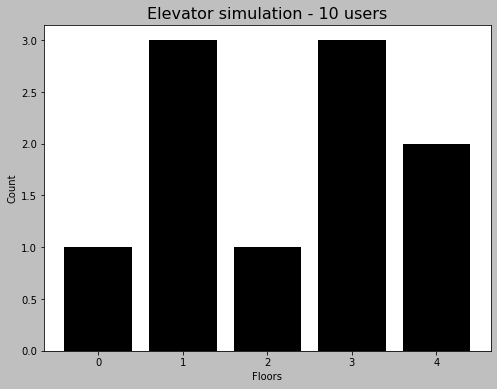

In [87]:
data = elevator.floor_count
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(figsize=(8,6))
plt.style.use("grayscale")

#ax.bar(bar_labels, counts)
plt.xlabel("Floors")
plt.ylabel("Count")
ax.set_title('Elevator simulation - 10 users')
ax.title.set_size(16)
plt.bar(range(len(data)), values, tick_label=names)

plt.show()